# Ciclo de Krebs - Representação em Grafo

Mapa das reações do ciclo de Krebs destacando os compostos-chave da oxidação completa da glicose. As ligações entre os nós representam as reações do ciclo metabólico, organizadas em pares substrato-produto através de uma estrutura de dicionário. Os pesos nas conexões indicam quais enzimas são responsáveis por catalizar cada etapa geradora de ATP.

In [4]:

ciclo_de_krebs = {
    "acetil-CoA": {
        "citrato": {"label": "citrato-Sintetase "}
    },
    
    "citrato": {
        "cis-Aconitato": {"label": "aconitase"},
        "acetil-CoA": {"label": ""}
    },
    
    "cis-Aconitato":{
        "isocitrato": {"label": "aconitase"},
        "citrato": {"label": ""}
    },
    
    "isocitrato": {
        "oxalosuccinato": {"label":"isocitrato-desidrogenase"},
        "cis-Aconitato": {"label": ""}
    },
    
    "oxalosuccinato":{
        "a-Cetoglutarato": {"label": "isocitrato-desidrogenase"},
        "isocitrato": {"label": ""}
    },
    
    "a-cetoglutarato": {
        "cuccinil-CoA": {"label": "a-cetoglutarato-desidrogenase"},
        "oxalosuccinato": {"label": ""}
    },
    
    "succinil-CoA": {
        "succinato": {"label": "succinil-CoA-sintetase"},
        "a-cetoglutarato": {"label": ""}
    },
    
    "succinato": {
        "fumarato": {"label": "succinato-desidrogenase"},
        "succinil-CoA": {"label": ""}
    },
    
    "fumarato": {
        "l-malato": {"label": "fumarase"},
        "succinato": {"label": ""}
    }, 
    
    "l-malato": {
        "oxaloacetato": {"label": "malato-desidrogenase"},
        "fumarato": {"label": ""}
    },
    
    "oxaloacetato": {
        "citrato": {"label": ""},
        "l-malato": {"label": ""}
    }
    
} 

7


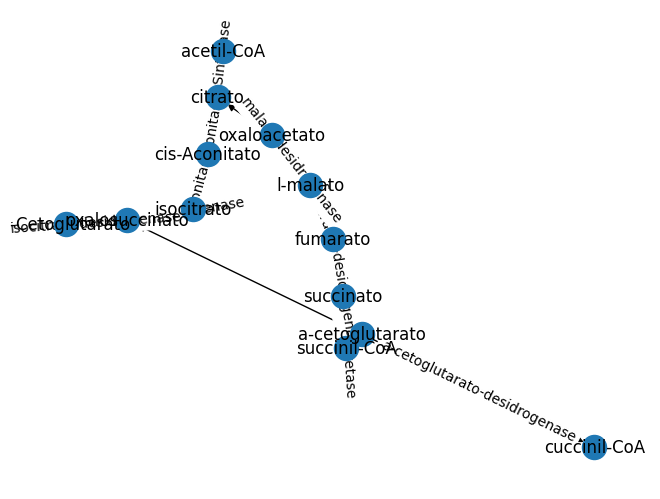

In [5]:
from random import randint
import networkx as nx

SEMENTE_ALEATORIA = randint(1, 100)

print(SEMENTE_ALEATORIA)

NOME_ROTULO = "label"
 
g = nx.DiGraph(ciclo_de_krebs)
 
posicao = nx.spring_layout(g, seed=SEMENTE_ALEATORIA)

nx.draw(g, with_labels=True, pos=posicao)
 
pesos = nx.get_edge_attributes(g, NOME_ROTULO)

nx.draw_networkx_edge_labels(g, posicao, edge_labels=pesos);

strict digraph "" {
	"acetil-CoA" -> citrato	[label="citrato-Sintetase "];
	citrato -> "acetil-CoA";
	citrato -> "cis-Aconitato"	[label=aconitase];
	"cis-Aconitato" -> citrato;
	"cis-Aconitato" -> isocitrato	[label=aconitase];
	isocitrato -> "cis-Aconitato";
	isocitrato -> oxalosuccinato	[label="isocitrato-desidrogenase"];
	oxalosuccinato -> isocitrato;
	oxalosuccinato -> "a-Cetoglutarato"	[label="isocitrato-desidrogenase"];
	"a-cetoglutarato" -> oxalosuccinato;
	"a-cetoglutarato" -> "cuccinil-CoA"	[label="a-cetoglutarato-desidrogenase"];
	"succinil-CoA" -> "a-cetoglutarato";
	"succinil-CoA" -> succinato	[label="succinil-CoA-sintetase"];
	succinato -> "succinil-CoA";
	succinato -> fumarato	[label="succinato-desidrogenase"];
	fumarato -> succinato;
	fumarato -> "l-malato"	[label=fumarase];
	"l-malato" -> fumarato;
	"l-malato" -> oxaloacetato	[label="malato-desidrogenase"];
	oxaloacetato -> citrato;
	oxaloacetato -> "l-malato";
}



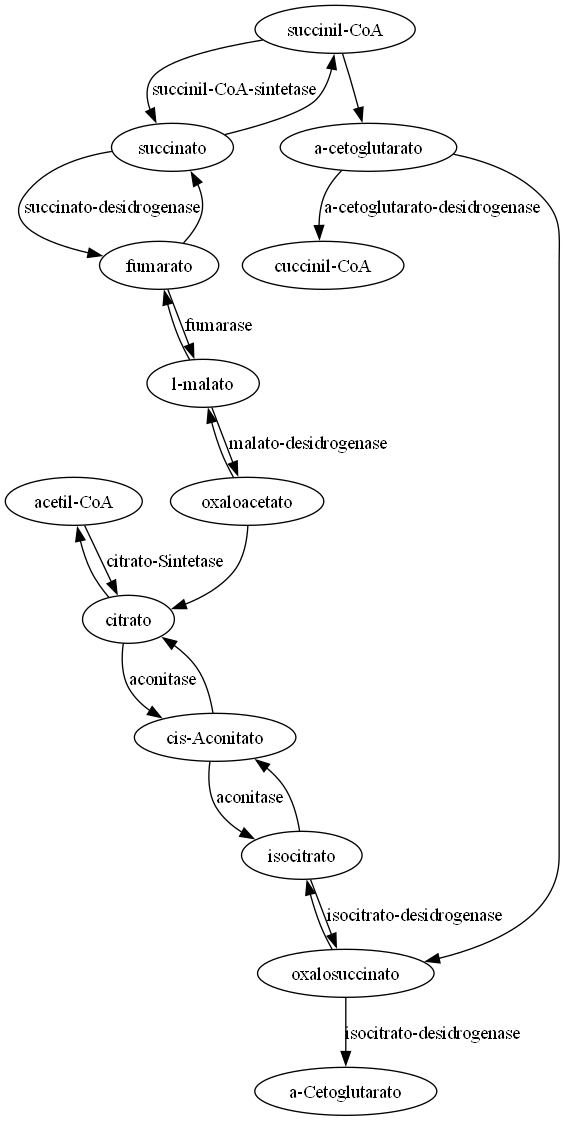

In [8]:
from networkx.drawing.nx_agraph import to_agraph
 
ciclo_de_krebs = to_agraph(g)
 
print(ciclo_de_krebs.to_string())
 
from IPython.display import Image, display
 
display(Image(ciclo_de_krebs.draw(format="png", prog="dot")))
 